<a href="https://colab.research.google.com/github/KARENCMP82/SQL/blob/main/SQL_Semana_2_para_seguir_los_videos_sentencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#https://sqliteviewer.flowsoft7.com/
from google.colab import files
load=files.upload()

Saving parte2.db to parte2.db


In [27]:
import sqlite3
import pandas as pd

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')

# Consulta SQL
query = "SELECT * FROM clientes_b;"

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los primeros registros
print(data.head())

# Cerrar la conexión
conexion.close()


   id_cliente nombre apellido  edad provincia  fecha_alta
0      100017  PAULA  VIVEROS    37  Misiones  2021-03-03
1      100018  RAMON   TELLES    35  Misiones  2021-03-20


# TIPOS DE SENTENCIAS SQL



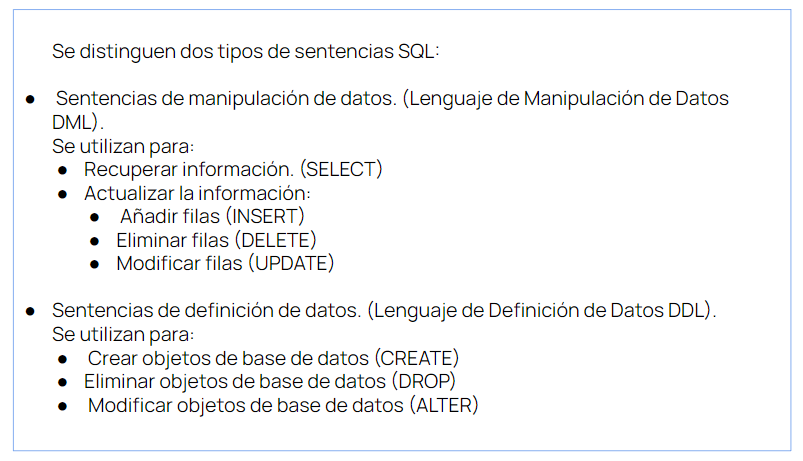

# Importante

Es importante entender que de todas las sentencias que estamos viendo en este curso, unicamente SELECT devuelve una salida de datos. Es decir que enviamos una orden al servidor y el servidor nos enviará de vuelta los datos para que los visualicemos.

Es por ello que en el código Python que envuelve la sentencia de SQL introducimos las dos últimas líneas de código:



* cols = [description[0] for description in cursor.description]

* pd.DataFrame(cursor.fetchall(), columns=cols)



Únicamente utilizaremos esas dos líneas de código cuando intentemos recuperar información.

Para todas las demás sentencias omitiremos esas dos líneas de código, utilizando el resto del código python.

# Sentencias de manipulación de datos

## La sentencia SELECT

Recupera datos de una base de datos.

In [28]:
query = '''

SELECT (listado de identificadores de columnas, constantes o funciones, todo separado por comas)

FROM (tabla principal)

JOIN (tabla vinculada)

WHERE (una o mas expresiones conformadas por identificadores, constantes y operadores)

GROUP BY (listado de identificadores de columnas o funciones cuyos valores conformaran los grupos)

HAVING (una o mas expresiones conformadas por identificadores, constantes y operadores)

ORDER BY (listado de identificadores de columnas o funciones cuyos valores serán ordenados)
;

 '''

## Sentencia INSERT

Esta sentencia es utilizada para insertar filas de datos a las tablas existentes.


In [68]:
import sqlite3
import pandas as pd

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')

# Consulta SQL
query = "SELECT * FROM clientes;"

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los primeros registros
print(data)

# Cerrar la conexión
conexion.close()

    id_cliente    nombre   apellido  edad     provincia  fecha_alta
0            1      None      PEREZ    50         CHACO  2021-04-25
1            2      None    SANCHEZ    51      MISIONES  2021-04-25
2       100000    ALVARO     TORRES    46         Salta  2021-03-03
3       100001    ADRIAN  HERNANDEZ    35      LA RIOJA  2021-03-03
4       100002     KAREN      VEGAS    10        MALAGA  2021-03-24
5       100003       ANA   GONZÁLEZ    40         Jujuy  2021-11-02
6       100004    ANDREA    NAVARRO    35       Córdoba  2021-04-21
7       100005  CRISTINA    SALINAS    46       Córdoba  2021-04-21
8       100006    DANIEL     SETIÉN    43  Buenos Aires  2021-04-21
9       100007     DAVID       CRUZ    46      La Pampa  2021-04-13
10      100008     DIEGO     GARCÍA    25      La Rioja  2021-04-21
11      100009     IRENE        GAS    27         Salta  2021-04-21
12      100010    JAVIER      GÓMEZ    40       Córdoba  2021-04-13
13      100011     JORGE     CURIEL    39  Bueno

Podemos insertar datos sin especificar a qué columnas se los estamos insertando siempre y cuando no omitamos ninguna columna y los datos se inserten en orden.

In [75]:
import sqlite3
import pandas as pd

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL corregida
query = '''INSERT INTO clientes_b (id_cliente, nombre, apellido, edad, provincia, fecha_alta)
VALUES
(100001, 'ADRIAN', 'HERNANDEZ', 35, 'LA RIOJA', '2021-03-03'),
(100002, 'KAREN', 'VEGAS', 10, 'MALAGA', '2021-03-24');
'''
# Mostrar los primeros registros
print(data)

# Cerrar la conexión
conexion.close()


    id_cliente    nombre   apellido  edad     provincia  fecha_alta
0            1      None      PEREZ    50         CHACO  2021-04-25
1            2      None    SANCHEZ    51      MISIONES  2021-04-25
2       100000    ALVARO     TORRES    46         Salta  2021-03-03
3       100001    ADRIAN  HERNANDEZ    35      LA RIOJA  2021-03-03
4       100002     KAREN      VEGAS    10        MALAGA  2021-03-24
5       100003       ANA   GONZÁLEZ    40         Jujuy  2021-11-02
6       100004    ANDREA    NAVARRO    35       Córdoba  2021-04-21
7       100005  CRISTINA    SALINAS    46       Córdoba  2021-04-21
8       100006    DANIEL     SETIÉN    43  Buenos Aires  2021-04-21
9       100007     DAVID       CRUZ    46      La Pampa  2021-04-13
10      100008     DIEGO     GARCÍA    25      La Rioja  2021-04-21
11      100009     IRENE        GAS    27         Salta  2021-04-21
12      100010    JAVIER      GÓMEZ    40       Córdoba  2021-04-13
13      100011     JORGE     CURIEL    39  Bueno

Tambien podemos insertar múltiples filas en una sola sentencia.

In [74]:
import sqlite3
import pandas as pd

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL
query = '''INSERT INTO clientes_b (id_cliente, nombre, apellido, edad, provincia, fecha_alta)
VALUES
(100000,	'ALVARO',	'TORRES',	46,	'Salta',	'2021-03-03'),
(100003,	'ANA',	'GONZÁLEZ',	40,	'Jujuy',	'2021-11-02'),
(100004,	'ANDREA',	'NAVARRO',	35,	'Córdoba',	'2021-04-21'),
(100005,	'CRISTINA',	'SALINAS',	46,	'Córdoba',	'2021-04-21'),
(100006,	'DANIEL',	'SETIÉN',	43,	'Buenos Aires',	'2021-04-21'),
(100007,	'DAVID',	'CRUZ',	46,	'La Pampa',	'2021-04-13'),
(100008,	'DIEGO',	'GARCÍA',	25,	'La Rioja',	'2021-04-21'),
(100009,	'IRENE',	'GAS',	27,	'Salta',	'2021-04-21'),
(100010,	'JAVIER',	'GÓMEZ',	40,	'Córdoba',	'2021-04-13'),
(100011,	'JORGE',	'CURIEL',	39,	'Buenos Aires',	'2021-04-21'),
(100012,	'LAURA',	'VERDUZCO',	39,	'Buenos Aires',	'2021-04-21'),
(100013,	'MARIA',	'VARELA',	24,	'Buenos Aires',	'2021-03-20'),
(100014,	'MARTA',	'ROSAS',	43,	'Córdoba',	'2021-04-20')
'''

# Mostrar los primeros registros
print(data)

# Cerrar la conexión
conexion.close()

    id_cliente    nombre   apellido  edad     provincia  fecha_alta
0            1      None      PEREZ    50         CHACO  2021-04-25
1            2      None    SANCHEZ    51      MISIONES  2021-04-25
2       100000    ALVARO     TORRES    46         Salta  2021-03-03
3       100001    ADRIAN  HERNANDEZ    35      LA RIOJA  2021-03-03
4       100002     KAREN      VEGAS    10        MALAGA  2021-03-24
5       100003       ANA   GONZÁLEZ    40         Jujuy  2021-11-02
6       100004    ANDREA    NAVARRO    35       Córdoba  2021-04-21
7       100005  CRISTINA    SALINAS    46       Córdoba  2021-04-21
8       100006    DANIEL     SETIÉN    43  Buenos Aires  2021-04-21
9       100007     DAVID       CRUZ    46      La Pampa  2021-04-13
10      100008     DIEGO     GARCÍA    25      La Rioja  2021-04-21
11      100009     IRENE        GAS    27         Salta  2021-04-21
12      100010    JAVIER      GÓMEZ    40       Córdoba  2021-04-13
13      100011     JORGE     CURIEL    39  Bueno

Además, podemos insertar valores en columnas específicas explícitamente.


In [73]:
import sqlite3
import pandas as pd

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL
query = '''

INSERT INTO
  clientes_b (apellido , edad, provincia, fecha_alta)
VALUES
  ('PEREZ', 50 , 'CHACO', '2021-04-25'),
  ('SANCHEZ', 51 , 'MISIONES', '2021-04-25')
;

 '''

# Mostrar los primeros registros
print(data)

# Cerrar la conexión
conexion.close()

    id_cliente    nombre   apellido  edad     provincia  fecha_alta
0            1      None      PEREZ    50         CHACO  2021-04-25
1            2      None    SANCHEZ    51      MISIONES  2021-04-25
2       100000    ALVARO     TORRES    46         Salta  2021-03-03
3       100001    ADRIAN  HERNANDEZ    35      LA RIOJA  2021-03-03
4       100002     KAREN      VEGAS    10        MALAGA  2021-03-24
5       100003       ANA   GONZÁLEZ    40         Jujuy  2021-11-02
6       100004    ANDREA    NAVARRO    35       Córdoba  2021-04-21
7       100005  CRISTINA    SALINAS    46       Córdoba  2021-04-21
8       100006    DANIEL     SETIÉN    43  Buenos Aires  2021-04-21
9       100007     DAVID       CRUZ    46      La Pampa  2021-04-13
10      100008     DIEGO     GARCÍA    25      La Rioja  2021-04-21
11      100009     IRENE        GAS    27         Salta  2021-04-21
12      100010    JAVIER      GÓMEZ    40       Córdoba  2021-04-13
13      100011     JORGE     CURIEL    39  Bueno

Por último, podemos insertar filas provenientes de otra tabla.

In [61]:
import sqlite3
import pandas as pd

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL
query = '''
INSERT INTO clientes
SELECT *
FROM clientes_b
WHERE id_cliente NOT IN (SELECT id_cliente FROM clientes);

'''

# Mostrar los primeros registros
print(data)

# Cerrar la conexión
conexion.close()

    id_cliente    nombre   apellido  edad     provincia  fecha_alta
0            1      None      PEREZ    50         CHACO  2021-04-25
1            2      None    SANCHEZ    51      MISIONES  2021-04-25
2       100000    ALVARO     TORRES    46         Salta  2021-03-03
3       100001    ADRIAN  HERNANDEZ    35      LA RIOJA  2021-03-03
4       100002     KAREN      VEGAS    10        MALAGA  2021-03-24
5       100003       ANA   GONZÁLEZ    40         Jujuy  2021-11-02
6       100004    ANDREA    NAVARRO    35       Córdoba  2021-04-21
7       100005  CRISTINA    SALINAS    46       Córdoba  2021-04-21
8       100006    DANIEL     SETIÉN    43  Buenos Aires  2021-04-21
9       100007     DAVID       CRUZ    46      La Pampa  2021-04-13
10      100008     DIEGO     GARCÍA    25      La Rioja  2021-04-21
11      100009     IRENE        GAS    27         Salta  2021-04-21
12      100010    JAVIER      GÓMEZ    40       Córdoba  2021-04-13
13      100011     JORGE     CURIEL    39  Bueno

## Sentencia DELETE

Esta sentencia nos permite borrar filas de nuestras tablas.

Si no indicamos una condición de filtro en el WHERE, la sentencia borrará todas las filas de datos de la tabla.

In [63]:
conexion = sqlite3.connect('parte2.db', timeout=10)  # Espera hasta 10 segundos si la base de datos está bloqueada
conexion.close()  # Cierra la conexión
conexion = sqlite3.connect('parte2.db')  # Reabre la conexión


In [76]:
# Con esa condición en el WHERE, solo borraremos las filas con id superior a 100014
import sqlite3

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL
query = "DELETE FROM clientes_b WHERE id_cliente > 100014;"

# Mostrar los primeros registros
print(data)

# Cerrar la conexión
conexion.close()

print("Filas eliminadas con éxito.")



    id_cliente    nombre   apellido  edad     provincia  fecha_alta
0            1      None      PEREZ    50         CHACO  2021-04-25
1            2      None    SANCHEZ    51      MISIONES  2021-04-25
2       100000    ALVARO     TORRES    46         Salta  2021-03-03
3       100001    ADRIAN  HERNANDEZ    35      LA RIOJA  2021-03-03
4       100002     KAREN      VEGAS    10        MALAGA  2021-03-24
5       100003       ANA   GONZÁLEZ    40         Jujuy  2021-11-02
6       100004    ANDREA    NAVARRO    35       Córdoba  2021-04-21
7       100005  CRISTINA    SALINAS    46       Córdoba  2021-04-21
8       100006    DANIEL     SETIÉN    43  Buenos Aires  2021-04-21
9       100007     DAVID       CRUZ    46      La Pampa  2021-04-13
10      100008     DIEGO     GARCÍA    25      La Rioja  2021-04-21
11      100009     IRENE        GAS    27         Salta  2021-04-21
12      100010    JAVIER      GÓMEZ    40       Córdoba  2021-04-13
13      100011     JORGE     CURIEL    39  Bueno

In [ ]:
# Si no utilizamos el WHERE entonces borraremos todas las filas de la tabla

import sqlite3

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL
query = "DELETE FROM CLIENTES;"
NO EJECUTAR ESTO

# Mostrar los primeros registros
print(data)

# Cerrar la conexión
conexion.close()


## La sentencia UPDATE

Esta sentencia nos permite modificar los valores que tiene almacenados una tabla.

In [78]:
# Para indicar las filas donde queremos realizar el UPDATE utilizaremos un WHERE, y para indicar las columnas donde queremos modificar los datos escribiremos el nombre de su identificador luego
# de la palabra SET y le asignaremos el nuevo valor mediante el operador = .

import sqlite3

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL
query = '''
UPDATE clientes
SET nombre = 'ROBERTO', provincia= 'NEUQUÉN', fecha_alta = '2021-03-07'
WHERE id_cliente = 100001
;
'''

# Mostrar  registros
print(data)

# Cerrar la conexión
conexion.close()


    id_cliente    nombre   apellido  edad     provincia  fecha_alta
0            1      None      PEREZ    50         CHACO  2021-04-25
1            2      None    SANCHEZ    51      MISIONES  2021-04-25
2       100000    ALVARO     TORRES    46         Salta  2021-03-03
3       100001    ADRIAN  HERNANDEZ    35      LA RIOJA  2021-03-03
4       100002     KAREN      VEGAS    10        MALAGA  2021-03-24
5       100003       ANA   GONZÁLEZ    40         Jujuy  2021-11-02
6       100004    ANDREA    NAVARRO    35       Córdoba  2021-04-21
7       100005  CRISTINA    SALINAS    46       Córdoba  2021-04-21
8       100006    DANIEL     SETIÉN    43  Buenos Aires  2021-04-21
9       100007     DAVID       CRUZ    46      La Pampa  2021-04-13
10      100008     DIEGO     GARCÍA    25      La Rioja  2021-04-21
11      100009     IRENE        GAS    27         Salta  2021-04-21
12      100010    JAVIER      GÓMEZ    40       Córdoba  2021-04-13
13      100011     JORGE     CURIEL    39  Bueno

# Sentencias de definición de datos

## La sentencia CREATE

La sentencia CREATE nos permite crear nuevas tablas desde 0, es decir vacias completamente para luego poder insertarle datos.

Con esta sentencia podemos definir exactamente cómo sera la estructura de nuestra tabla, introduciendo directivas y restricciones a como pueden ser pobladas de datos.

In [ ]:
CREATE TABLE [IF NOT EXISTS] [schema_name].table_name (
	column_1 data_type PRIMARY KEY,
   	column_2 data_type NOT NULL,
	column_3 data_type DEFAULT 0,
	table_constraints
);

In [84]:
import sqlite3

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL corregida
query = '''
CREATE TABLE clientes_2
(
    id_Cliente INTEGER PRIMARY KEY,
    Nombre TEXT NOT NULL,
    Apellido TEXT UNIQUE,
    Edad INTEGER,
    Provincia TEXT CHECK(LENGTH(Provincia) < 5),
    fecha_Alta TEXT
);
'''

# Ejecutar la consulta para crear la tabla
cursor.execute(query)

# Confirmar los cambios
conexion.commit()

# Cerrar la conexión
conexion.close()


In [86]:
import sqlite3
import pandas as pd

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')

# Consulta SQL
query = "SELECT * FROM clientes_2;"

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)

# Cerrar la conexión
conexion.close()


Empty DataFrame
Columns: [id_Cliente, Nombre, Apellido, Edad, Provincia, fecha_Alta]
Index: []


In [88]:
#  Así funciona el constraint NOT NULL
import sqlite3

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')

# Consulta SQL
query = '''
INSERT INTO clientes_2 (id_cliente, Nombre, apellido, edad, provincia, fecha_alta)
VALUES
(100006, 'SETIÉN', 43, 'Buen', '2021-04-21'),
(100007, 'CRUZ', 46, 'La', '2021-04-13');
'''

# Ejecutar la consulta
cursor = conexion.cursor()
cursor.execute(query)
conexion.commit()

# Cerrar la conexión
conexion.close()

print("Registros insertados con éxito.")



Registros insertados con éxito.


In [ ]:
# Dejamos adrede sin completar la edad para ver como funciona el DEFAULT
query = '''

INSERT INTO clientes_2 (id_cliente, nombre, apellido, provincia, fecha_alta)
VALUES

(100006, 'DANIEL',	'SETIÉN', 'Buen',	'2021-04-21'),
(100007,	'DAVID',	'CRUZ',	'La',	'2021-04-13')

'''

cursor.execute(query)
conexion.commit()

In [90]:
# Ahora vemos como funciona el CHECK
import sqlite3

# Conexión a la base de datos SQLite
conexion = sqlite3.connect('parte2.db')
cursor = conexion.cursor()

# Consulta SQL corregida
query = '''
INSERT INTO clientes_2 (id_cliente, Nombre, apellido, edad, provincia, fecha_alta)
VALUES
(100012, 'LAURA', 'VERDUZCO', 39, 'bUENOS AIRES', '2021-04-21'),
(100013, 'MARIA', 'VARELA', 24, 'La', '2021-03-20');
'''

# Ejecutar la consulta
cursor.execute(query)
conexion.commit()

# Cerrar la conexión
conexion.close()

print("Registros insertados con éxito.")



IntegrityError: CHECK constraint failed: LENGTH(Provincia) < 5

### Existe otro método muy utilizado para crear tablas al vuelo sin tener que definir su estructura previamente.

Este método toma la estructura y los datos de otra tabla existente y con ellos crea la nueva tabla.

Para ello tenemos que incluir luego del nombre de la tabla la palabra clave AS
y proceder a realizar un SELECT para traer los datos de la otra tabla. Este SELECT puede ser todo lo complejo que querramos y puede incluir muchas tablas relacionadas.

In [ ]:
query = '''

CREATE TABLE clientes_3 AS
SELECT *
FROM clientes

'''
cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
  *
FROM
 clientes_3


 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

## La clave primaria

La clave primaria es el identificador unívoco de cada fila de la entidad.
Por defecto incluye el constraint UNIQUE.

In [ ]:
# Creamos otra tabla nueva para trabajar con ella
query = '''

CREATE TABLE  clientes_4
(
id_cliente INTEGER PRIMARY KEY,
nombre TEXT ,
apellido TEXT ,
edad INTEGER ,
provincia TEXT ,
fecha_alta TEXT
)

'''
cursor.execute(query)
conexion.commit()

In [ ]:
# La borramos para crearla de nuevo con una PK de dos columnas
query = '''

DROP TABLE clientes_4
;


 '''

cursor.execute(query)
conexion.commit()

La clave primaria puede estar conformada por una o mas columnas. Si quisieramos una clave primaria conformada por varias columnas, debemos indicarlo al final de la sentencia.


In [ ]:
query = '''

CREATE TABLE  clientes_4
(
id_cliente INTEGER ,
nombre TEXT ,
apellido TEXT ,
edad INTEGER ,
provincia TEXT ,
fecha_alta TEXT,
PRIMARY KEY (id_cliente, nombre)
)


'''
cursor.execute(query)
conexion.commit()

In [ ]:
# Insertamos datos en la tabla recién creada
query = '''

INSERT INTO clientes_4
VALUES

(100011,	'JORGE',	'CURIEL',	39,	'Buenos Aires',	'2021-04-21'),
(100012,	'LAURA',	'VERDUZCO',	39,	'Buenos Aires',	'2021-04-21'),
(100013,	'MARIA',	'VARELA',	24,	'Buenos Aires',	'2021-03-20'),
(100014,	'MARTA',	'ROSAS',	43,	'Córdoba',	'2021-04-20'),
(100015,	'MIGUEL',	'VALDÉS',	34,	'Salta',	'2021-03-24'),
(100016,	'PABLO',	'VANEGAS',	39,	'Jujuy',	'2021-02-25'),
(100017,	'PAULA',	'VIVEROS',	37,	'Misiones',	'2021-03-03')

'''

cursor.execute(query)
conexion.commit()

In [ ]:
#  La borramos nuevamente para crearla de nuevo con una PK de una sola columna ya que la necesitamos así para el siguiente ejemplo
query = '''

DROP TABLE clientes_4

 '''

cursor.execute(query)
conexion.commit()

In [ ]:
#  La volvemos a crear con una PK de una sola columna (id_cliente)
query = '''
CREATE TABLE clientes_4
(
id_cliente INTEGER PRIMARY KEY,
nombre TEXT,
apellido TEXT,
edad INTEGER,
provincia TEXT,
fecha_alta TEXT

)


'''
cursor.execute(query)
conexion.commit()

In [ ]:
#  La poblamos de datos
query = '''

INSERT INTO clientes_4
VALUES

(100011,	'JORGE',	'CURIEL',	39,	'Buenos Aires',	'2021-04-21'),
(100012,	'LAURA',	'VERDUZCO',	39,	'Buenos Aires',	'2021-04-21'),
(100013,	'MARIA',	'VARELA',	24,	'Buenos Aires',	'2021-03-20'),
(100014,	'MARTA',	'ROSAS',	43,	'Córdoba',	'2021-04-20'),
(100015,	'MIGUEL',	'VALDÉS',	34,	'Salta',	'2021-03-24'),
(100016,	'PABLO',	'VANEGAS',	39,	'Jujuy',	'2021-02-25'),
(100017,	'PAULA',	'VIVEROS',	37,	'Misiones',	'2021-03-03')

'''

cursor.execute(query)
conexion.commit()

## La clave foránea

In [ ]:
query = '''

PRAGMA foreign_keys = ON;

 '''

cursor.execute(query)
conexion.commit()

In [ ]:
# Creamos una tabla de ventas con una clave foránea que es el id_cliente
query = '''

CREATE TABLE  ventas
(
id_venta INTEGER ,
id_vendedor INTEGER ,
id_cliente INTEGER ,
fecha_venta TEXT ,
cantidad INTEGER ,
valor_total INTEGER,
PRIMARY KEY (id_venta, id_vendedor),
FOREIGN KEY (id_cliente) REFERENCES clientes_4 (id_cliente)
            ON DELETE RESTRICT ON UPDATE NO ACTION

)

'''
cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

INSERT INTO ventas
VALUES

(100002, 01,	100014,	'2021-04-24',	5,	500),
(100003, 02,	100015,	'2021-04-24',	4,	100),
(100004, 01,	100015,	'2021-04-24',	1,	50),
(100005, 01,	100016,	'2021-04-24',	1,	50)


'''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  ventas

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

In [ ]:
# Tratamos de borrar un cliente para ver como funciona la clave foránea
query = '''

DELETE FROM clientes_4
WHERE id_cliente = 100014

;
 '''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

DROP TABLE IF EXISTS ventas
;
 '''

cursor.execute(query)
conexion.commit()

In [ ]:
# Creamos una tabla de ventas con una clave foránea que es el id_clientes. Le pedimos que cuando borremos una fila de la tabla clientes cambie el id_cliente en esta tabla a NULL
query = '''

CREATE TABLE  ventas
(
id_venta INTEGER ,
id_vendedor INTEGER ,
id_cliente INTEGER ,
fecha_venta TEXT ,
cantidad INTEGER ,
valor_total INTEGER,
PRIMARY KEY (id_venta, id_vendedor),
FOREIGN KEY (id_cliente) REFERENCES clientes_4 (id_cliente)
            ON DELETE SET NULL ON UPDATE NO ACTION

)

'''
cursor.execute(query)
conexion.commit()

In [ ]:
# Poblamos la tabla
query = '''

INSERT INTO ventas
VALUES
(100002, 01,	100014,	'2021-04-24',	5,	500),
(100003, 02,	100015,	'2021-04-24',	4,	100),
(100004, 01,	100015,	'2021-04-24',	1,	50),
(100005, 01,	100016,	'2021-04-24',	1,	50)

;
'''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  ventas

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

In [ ]:
# Tratamos de borrar un cliente para ver como funciona la clave foránea
query = '''

DELETE FROM clientes_4
WHERE id_cliente = 100014

;
 '''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  ventas

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

## La sentencia DROP

Esta sentencia sirve para borrar completamente una tabla de nuestra base de datos.
Podemos poner IF EXISTS luego de DROP TABLE para evitar que nos de un error si la tabla no existía desde un principio.

In [ ]:
query = '''

DROP TABLE IF EXISTS ventas
;
 '''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  ventas

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

## La sentencia ALTER

Esta sentencia nos permite realizar cambios estructurales a nuestras tablas.

Desde cambiar el nombre o el tipo de datos de una columna, hasta quitar completamente columnas de nuestra tabla.

In [ ]:
#  Renombramos la tabla
query = '''
ALTER TABLE clientes_4
RENAME TO clientes_final

 '''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  clientes_final

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

In [ ]:
#  Añadimos una columna nueva a la tabla
query = '''
ALTER TABLE clientes_final
ADD COLUMN antiguedad DEFAULT 0

 '''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  clientes_final

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

In [ ]:
# Renombramos una columna de la tabla
query = '''
ALTER TABLE clientes_final
RENAME COLUMN antiguedad TO fecha_ingreso

 '''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  clientes_final

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

In [ ]:
# Quitamos la columna que añadimos antes
query = '''
ALTER TABLE clientes_final
DROP COLUMN fecha_ingreso

 '''

cursor.execute(query)
conexion.commit()

In [ ]:
query = '''

SELECT
*
FROM
  clientes_final

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)